## **Detección de fraude**

### Importar librerías necesarias

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [51]:
type(dataset)

pandas.core.frame.DataFrame

In [52]:
dataset.shape  #revisar cantidad de filas y columnas

(284807, 31)

In [158]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [159]:
dataset.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [160]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [55]:
dataset['Class'] #aqui veo la columna Class

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
dataset.loc[1] #aqui veo los valores de la fila con indice 1

In [ ]:
dataset.loc[4920]

In [4]:
dataset.isnull().sum() #verificar que no haya datos vacios en ninguna columna

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [164]:
newdata = dataset.drop(['V1', 'V2', 'V3','V4', 'V5', 'V6',
             'V7', 'V8', 'V9','V10', 'V11', 'V12',
             'V13', 'V14', 'V15','V16', 'V17', 'V18',
             'V19', 'V20', 'V21','V22', 'V23', 'V24',
             'V25', 'V26', 'V27','V28'], axis=1)
newdata.shape

(284807, 3)

In [165]:
newdata.describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


### Reducir el dataset a una décima parte para trabajar más fácil y rápido

In [163]:
datamin = newdata.sample(frac=0.1, random_state=0)
datamin.shape

(28481, 3)

## Quitar las columnas que  no tenemos idea qué significan

In [124]:
dataminmin = datamin.drop(['V1', 'V2', 'V3','V4', 'V5', 'V6',
             'V7', 'V8', 'V9','V10', 'V11', 'V12',
             'V13', 'V14', 'V15','V16', 'V17', 'V18',
             'V19', 'V20', 'V21','V22', 'V23', 'V24',
             'V25', 'V26', 'V27','V28'], axis=1)

In [10]:
prueba = datamin.drop(['V1', 'V2', 'V3','V4', 'V5', 'V6',             
             'V19', 'V20', 'V21','V22', 'V23', 'V24',
             'V25', 'V26', 'V27','V28'], axis=1)

In [166]:
datamin.shape


(28481, 3)

- Dividir el dataset minimizado entre fraudes y legítimos

In [167]:
#crear un dataset que contenga solo los fraudes
fraudes = datamin[datamin['Class'] == 1]
legitimos = datamin[datamin['Class']==0]

In [168]:
legitimos.shape

(28426, 3)

In [169]:
fraudes.shape

(55, 3)

## Aqui se revisarán las propiedades estadísticas de la columna "Amount" para el datase legítimo y para el fraudulento

### **Legítimo**

In [170]:
legitimos['Amount'].mean()

86.14928832758812

In [171]:
legitimos['Amount'].min()

0.0

In [172]:
legitimos['Amount'].max()

25691.16

In [173]:
legitimos['Amount'].median()

21.98

In [174]:
legitimos['Amount'].value_counts() #muestra los valores repetidos y cuantas veces

1.00      1366
1.98       619
9.99       506
0.89       504
15.00      350
          ... 
221.72       1
70.92        1
39.08        1
156.04       1
72.67        1
Name: Amount, Length: 8677, dtype: int64

### **Fraudulento**

In [21]:
fraudes['Amount'].mean()

89.60127272727274

In [22]:
fraudes['Amount'].min()

0.0

In [24]:
fraudes['Amount'].max()

925.31

In [25]:
fraudes['Amount'].median()

7.58

In [175]:
fraudes['Amount'].value_counts() #muestra los valores repetidos y cuantas veces

1.00      16
0.76       3
99.99      3
0.00       1
105.89     1
720.38     1
7.52       1
0.77       1
39.45      1
57.73      1
188.78     1
345.00     1
156.00     1
39.98      1
9.13       1
529.00     1
8.00       1
97.00      1
634.30     1
925.31     1
5.30       1
12.31      1
11.38      1
8.30       1
125.30     1
7.58       1
8.90       1
6.27       1
38.76      1
0.38       1
30.26      1
130.21     1
237.26     1
119.74     1
1.63       1
2.00       1
Name: Amount, dtype: int64

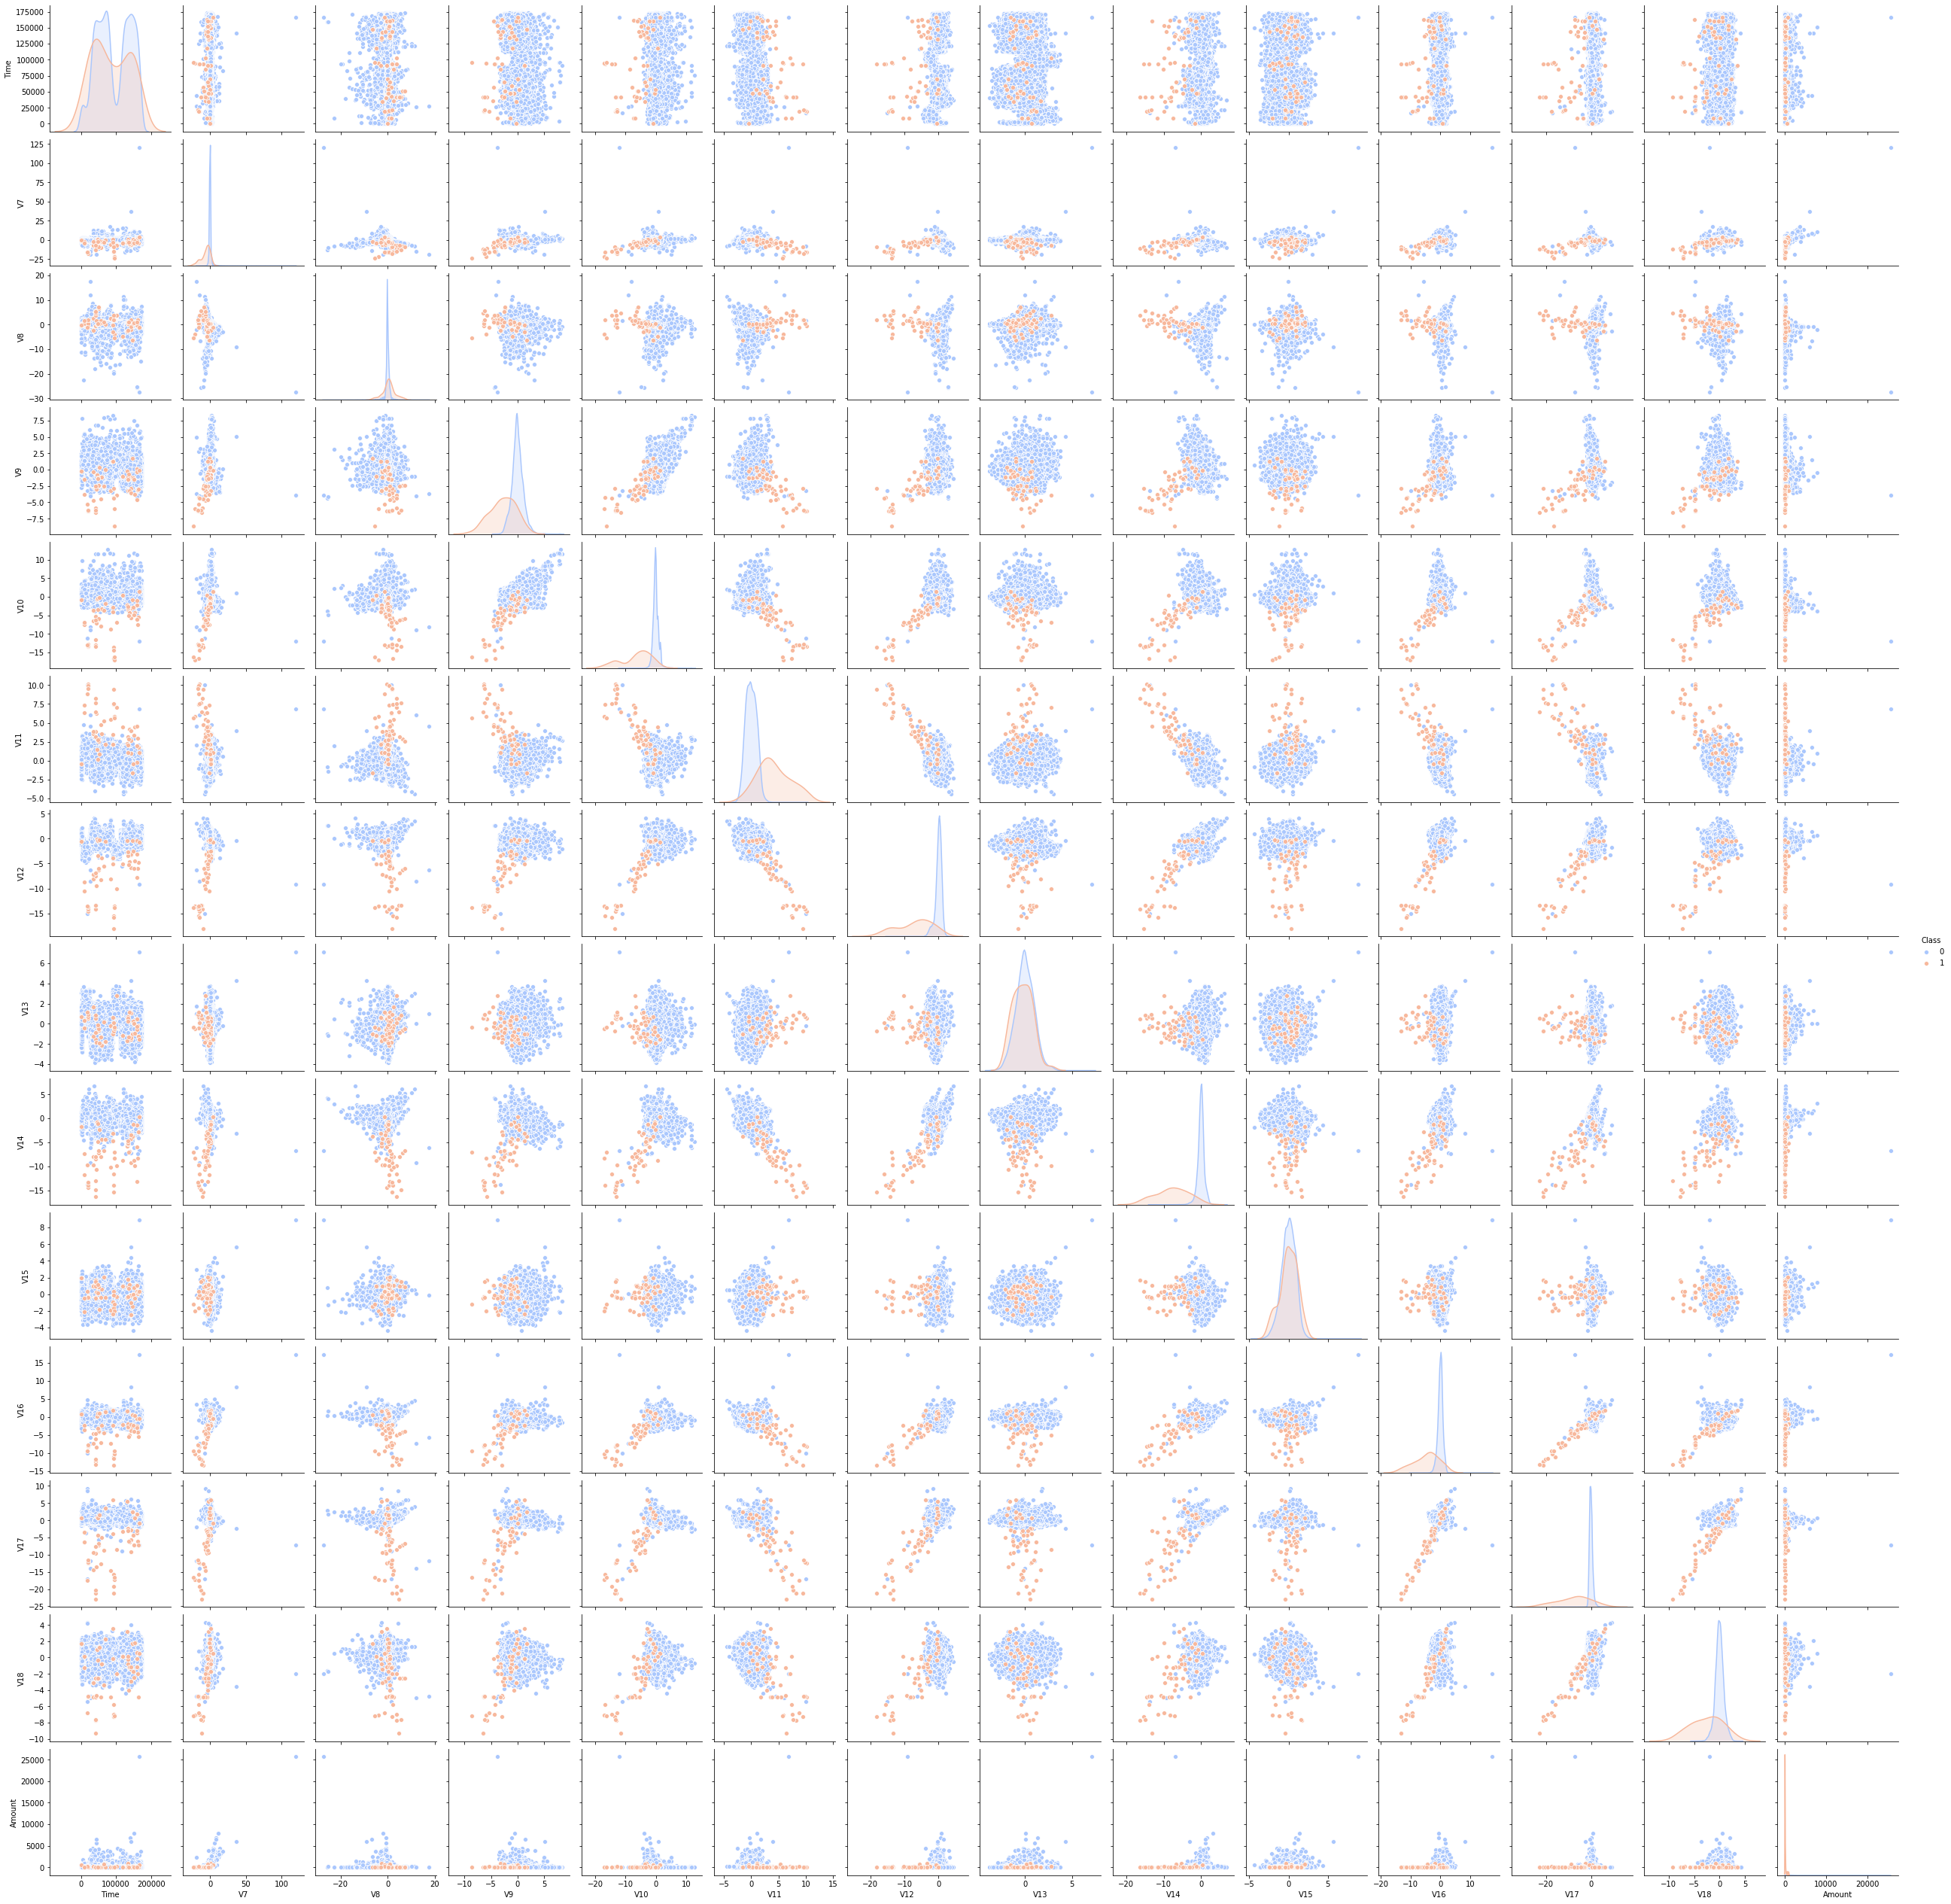

In [178]:
sns.pairplot(prueba,hue='Class',palette='coolwarm') #se hizo un dataset de prueba con menos columnas

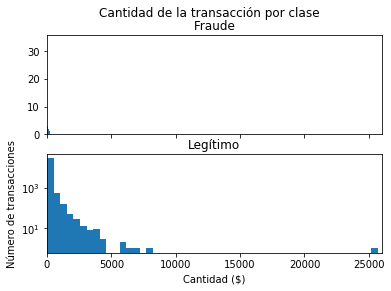

In [184]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Cantidad de la transacción por clase')
bins = 50
ax1.hist(fraudes.Amount, bins = bins)
ax1.set_title('Fraude')
ax2.hist(legitimos.Amount, bins = bins)
ax2.set_title('Legítimo')
plt.xlabel('Cantidad ($)')
plt.ylabel('Número de transacciones')
plt.xlim((0, 26000))
plt.yscale('log')
plt.show();

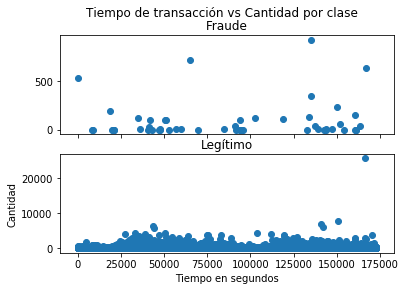

In [185]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Tiempo de transacción vs Cantidad por clase')
ax1.scatter(fraudes.Time, fraudes.Amount)
ax1.set_title('Fraude')
ax2.scatter(legitimos.Time, legitimos.Amount)
ax2.set_title('Legítimo')
plt.xlabel('Tiempo en segundos')
plt.ylabel('Cantidad')
plt.show()



In [ ]:
## Correlation
#get correlations of each features in dataset
corrmat = dataminmin.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataminmin[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [139]:
x = np.asanyarray(dataminmin.drop(columns=['Class']))
y = np.asanyarray(dataminmin[['Class']])

print(len(x))
x[0]

28481


array([1.19907e+05, 1.79000e+00])

In [140]:
print(len(y))
y[0]

28481


array([0], dtype=int64)

In [141]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)
print("xtrain size: " + str(len(xtrain)))
print("ytrain size: " + str(len(ytrain)))
print("xtest size: " + str(len(xtest)))
print("ytest size: " + str(len(ytest)))

xtrain size: 21360
ytrain size: 21360
xtest size: 7121
ytest size: 7121


In [142]:
clf = tree.DecisionTreeClassifier()
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [143]:
print('Clasification Report: \n',
      classification_report(ytrain, clf.predict(xtrain)))

Clasification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21327
           1       1.00      1.00      1.00        33

    accuracy                           1.00     21360
   macro avg       1.00      1.00      1.00     21360
weighted avg       1.00      1.00      1.00     21360



In [144]:
print('Clasification Report: \n',
      classification_report(ytrain, clf.predict(xtrain)))

Clasification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21327
           1       1.00      1.00      1.00        33

    accuracy                           1.00     21360
   macro avg       1.00      1.00      1.00     21360
weighted avg       1.00      1.00      1.00     21360



In [194]:
datamin.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,0
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,0
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00,0
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00,0


## Random forest

In [198]:
features.index[0]

183484

In [199]:
features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,0
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,0
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00,0
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00,0


In [203]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(datamin)# Display the first 5 rows of the last 12 columns
features.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,0
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,0
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00,0
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00,0


In [204]:
# Use numpy to convert to arrays
import numpy as np# Labels are the values we want to predict
labels = np.array(features['Class'])# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Class', axis = 1)# Saving feature names for later use
feature_list = list(features.columns)# Convert to numpy array
features = np.array(features)

In [205]:
print(feature_list)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [206]:
type(features)

numpy.ndarray

In [207]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [208]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape) 

Training Features Shape: (21360, 30)
Training Labels Shape: (21360,)
Testing Features Shape: (7121, 30)
Testing Labels Shape: (7121,)


In [209]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)print('Average baseline error: ', round(np.mean(baseline_errors), 2))
Average baseline error:  5.06 degrees.

SyntaxError: invalid syntax (<ipython-input-209-dfd536eca900>, line 3)

In [210]:
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)# Train the model on training data
rf.fit(train_features, train_labels);

In [212]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)# Calculate the absolute errors
errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.0 degrees.


## KNN

In [186]:
X_train, X_test, y_train, y_test = train_test_split(newdata.drop('Class', axis = 1),newdata['Class'],
                                                    test_size=0.30)

In [187]:
knn = KNeighborsClassifier(n_neighbors=1)

In [188]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [189]:
pred = knn.predict(X_test)

In [190]:
print(confusion_matrix(y_test,pred))

[[85132   157]
 [  140    14]]


In [191]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85289
           1       0.08      0.09      0.09       154

    accuracy                           1.00     85443
   macro avg       0.54      0.54      0.54     85443
weighted avg       1.00      1.00      1.00     85443



In [192]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    # print(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

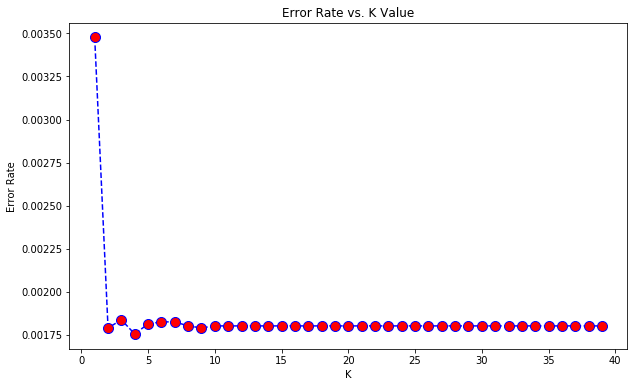

In [193]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [194]:
# NOW WITH K=4
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=4')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=4


[[85287     2]
 [  148     6]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85289
           1       0.75      0.04      0.07       154

    accuracy                           1.00     85443
   macro avg       0.87      0.52      0.54     85443
weighted avg       1.00      1.00      1.00     85443



([<matplotlib.axis.XTick at 0x1e895723708>,
 <a list of 5 Text xticklabel objects>)

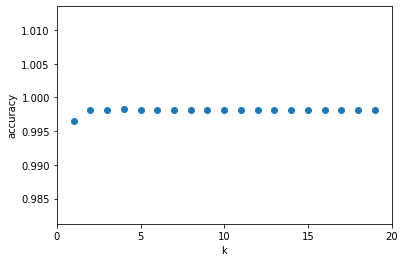

In [195]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])